<a href="https://colab.research.google.com/github/Smarth2005/Machine-Learning/blob/main/Exploratory%20Data%20Analysis/05.%20Simple%20Imputer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **NaNs ? Not Anymore.**

<div align="justify">

In the real world, data is rarely perfect. Whether it's a sensor that fails to report a reading, a user who skips a form field, or an error in data collection, **missing values**— often represented as `NaN` (Not a Number)—are a common issue in datasets.

Missing data can:
- Skew your analysis
- Lead to biased or inaccurate predictions
- Break machine learning models that expect complete input

Hence, handling missing values is one of the first and most critical steps in the data preprocessing pipeline.

There are several strategies to deal with missing data—ranging from simple techniques like dropping or filling with mean values, to advanced methods like KNN or regression-based imputation.

### 🤝 **Meet `SimpleImputer` from Scikit-learn**
The `SimpleImputer` class from Scikit-learn makes it easy to fill in missing values using basic strategies like:

| Strategy          | Use Case                      | Suitable For             | When to Use                                                                              |
| ----------------- | ----------------------------- | ------------------------ | ---------------------------------------------------------------------------------------- |
| `'mean'`          | Fills with mean of the column | Numerical                | When data is **normally distributed** and has **no significant outliers**                |
| `'median'`        | Fills with median             | Numerical                | When data is **skewed** or contains **outliers**                                         |
| `'most_frequent'` | Fills with most common value  | Categorical or Numerical | When a value appears **frequently** and dominates the distribution                       |
| `'constant'`      | Fills with a fixed value      | Categorical or Numerical | When you want to **distinguish imputed values** or use a placeholder like 0 or 'missing' |


</div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import files
uploaded = files.upload()

Saving income_evaluation.csv to income_evaluation.csv


In [3]:
df = pd.read_csv('income_evaluation.csv', na_values=' ?')
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
# Checking missing values
df.isnull().sum()

,0
age,0
workclass,1836
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,1843
relationship,0
race,0
sex,0


For exploration and learning purposes, we are intentionally injecting `NaN` values into some numerical features also to simulate missing data scenarios.

In [5]:
# hours per week missing values
np.random.seed(seed=0)
h = np.random.choice(a=df.index, replace=False, size=20)
df.loc[h, ' hours-per-week'] = np.nan

In [6]:
# age missing values
np.random.seed(seed=10)
a = np.random.choice(a=df.index, replace=False, size=28)
df.loc[a, 'age'] = np.nan

In [7]:
df.isna().sum()

,0
age,28
workclass,1836
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,1843
relationship,0
race,0
sex,0


<div align="justify">

`SimpleImputer` calculates statistics (like mean, median, etc.) from the data we give it using `.fit()`. If we fit it on the whole dataset before splitting, information from the test set “leaks” into the training process. This results in overly optimistic performance estimates.

Therefore, it is recommended to split the data (into training and testing sets) before applying `SimpleImputer` — or any preprocessing that learns from data — to avoid data leakage.

</div>

In [8]:
# separate independent and dependent features
X = df.drop(' income', axis=1)
y = df[' income']

# train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [9]:
x_train.isnull().sum()

,0
age,23
workclass,1452
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,1456
relationship,0
race,0
sex,0


First, we try to impute the `age` (numerical) column; for which we need to check the normality in order to decide the imputation strategy.

**Always check for normality on X_train, not the full dataset.**

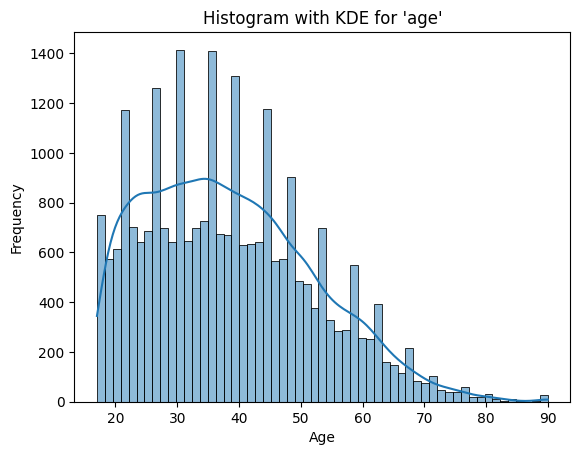

In [10]:
sns.histplot(x_train['age'], kde=True)
plt.title("Histogram with KDE for 'age'")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


Since the distribution of the 'age' feature is right-skewed, we use the `median` strategy with SimpleImputer to ensure robust imputation that is not affected by extreme values.

In [11]:
si_age = SimpleImputer(strategy='median', add_indicator=True)
si_age.fit_transform(x_train[['age']])

array([[64.,  0.],
       [40.,  0.],
       [36.,  0.],
       ...,
       [31.,  0.],
       [47.,  0.],
       [57.,  0.]])

In [12]:
pd.DataFrame(si_age.fit_transform(x_train[['age']]))

,0,1
0,64.0,0.0
1,40.0,0.0
2,36.0,0.0
3,33.0,0.0
4,48.0,0.0
...,...,...
26043,23.0,0.0
26044,61.0,0.0
26045,31.0,0.0
26046,47.0,0.0


In [13]:
si_age.statistics_

array([37.])

In [14]:
a = pd.DataFrame(si_age.fit_transform(x_train[['age']]))

In [15]:
a[a[1]==1]

,0,1
2969,37.0,1.0
3219,37.0,1.0
3522,37.0,1.0
4925,37.0,1.0
5543,37.0,1.0
5754,37.0,1.0
6305,37.0,1.0
7237,37.0,1.0
8587,37.0,1.0
11314,37.0,1.0


Now, we try for categorical feature, say, for example ` occupation`; for which we need to check if there is any dominating value.

In [16]:
x_train[' occupation'].value_counts(dropna=False)

,count
occupation,
Prof-specialty,3355
Exec-managerial,3311
Craft-repair,3280
Adm-clerical,3000
Sales,2919
Other-service,2608
Machine-op-inspct,1581
NaN,1456
Transport-moving,1282


/tmp/ipython-input-20-344002714.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = x_train[' occupation'], palette='viridis')


(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.]),
 [Text(0.0, 0, '0'),
  Text(500.0, 0, '500'),
  Text(1000.0, 0, '1000'),
  Text(1500.0, 0, '1500'),
  Text(2000.0, 0, '2000'),
  Text(2500.0, 0, '2500'),
  Text(3000.0, 0, '3000'),
  Text(3500.0, 0, '3500'),
  Text(4000.0, 0, '4000')])

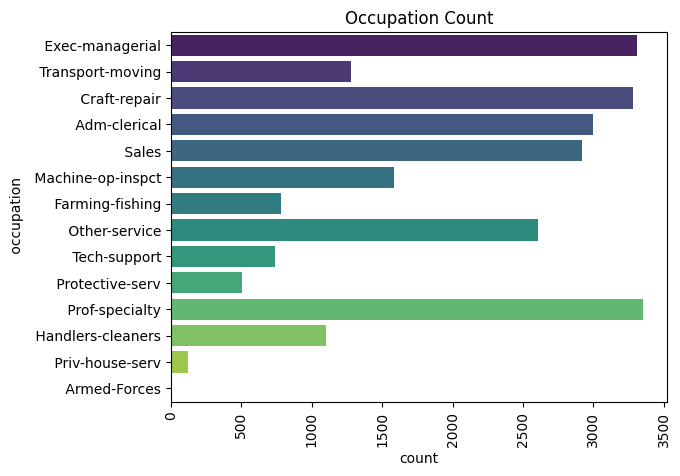

In [20]:
sns.countplot(data = x_train[' occupation'], palette='viridis')
plt.title("Occupation Count")
plt.xticks(rotation=90)

There is not any dominating value. We can, therefore, choose to fill the missing values with some placeholder. By default, it is `missing_value`.

In [21]:
si_occ = SimpleImputer(strategy='constant', add_indicator=True)

In [22]:
occ = pd.DataFrame(si_occ.fit_transform(x_train[[' occupation']]))

In [23]:
occ[occ[1]==True]

,0,1
26,missing_value,True
29,missing_value,True
51,missing_value,True
61,missing_value,True
73,missing_value,True
...,...,...
25968,missing_value,True
25974,missing_value,True
25998,missing_value,True
26004,missing_value,True


In [24]:
occ2 = SimpleImputer(strategy='constant', add_indicator=True, fill_value='not available')
o = pd.DataFrame(occ2.fit_transform(x_train[[' occupation']]))
o[o[1]==True]

,0,1
26,not available,True
29,not available,True
51,not available,True
61,not available,True
73,not available,True
...,...,...
25968,not available,True
25974,not available,True
25998,not available,True
26004,not available,True


In [25]:
b = pd.DataFrame(si_age.transform(x_test[['age']]))
b[b[1]==1]

,0,1
2526,37.0,1.0
4068,37.0,1.0
4111,37.0,1.0
5324,37.0,1.0
5930,37.0,1.0


In [26]:
otest = pd.DataFrame(occ2.transform(x_test[[' occupation']]))
otest[otest[1]==1]

,0,1
4,not available,True
12,not available,True
14,not available,True
25,not available,True
26,not available,True
...,...,...
6443,not available,True
6446,not available,True
6451,not available,True
6482,not available,True


Once the imputer was fitted on `X_train`, applying `.transform()` on `X_test` propagated the same strategy (e.g., median or most_frequent or the placeholder), ensuring the test data was imputed consistently.

Similarly, we can proceed to fill the NaNs in the other features.

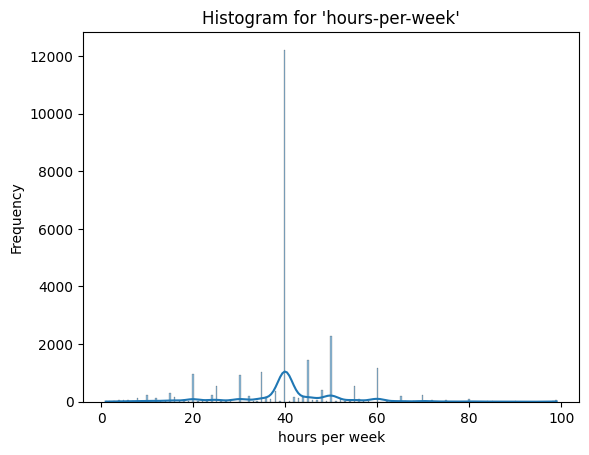

In [27]:
sns.histplot(x_train[' hours-per-week'],kde=True)
plt.title("Histogram for 'hours-per-week'")
plt.xlabel('hours per week')
plt.ylabel('Frequency')
plt.show()

In [28]:
x_train[' hours-per-week'].nunique()

89

In [29]:
x_train[' hours-per-week'].value_counts()

,count
hours-per-week,
40.0,12219
50.0,2266
45.0,1433
60.0,1166
35.0,1024
...,...
61.0,2
76.0,2
74.0,1


We observe that 40.0 is overwhelmingly dominant – far more frequent than all other values. Hence, The distribution is highly mode-driven, with long tail after 50.



In [30]:
imputer = SimpleImputer(strategy='most_frequent', add_indicator=True)
imputer.fit_transform(x_train[[' hours-per-week']])

array([[40.,  0.],
       [40.,  0.],
       [33.,  0.],
       ...,
       [34.,  0.],
       [45.,  0.],
       [38.,  0.]])

In [31]:
filled = pd.DataFrame(imputer.fit_transform(x_train[[' hours-per-week']]))
filled[filled[1]==1]

,0,1
1253,40.0,1.0
3274,40.0,1.0
4356,40.0,1.0
4577,40.0,1.0
6156,40.0,1.0
7512,40.0,1.0
7883,40.0,1.0
10308,40.0,1.0
10637,40.0,1.0
15528,40.0,1.0


In [32]:
x_train.isna().sum()
# This will show exactly the same number of missing values as before, because we didn't update the main DataFrame

,0
age,23
workclass,1452
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,1456
relationship,0
race,0
sex,0


In [33]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26048 entries, 10908 to 5925
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              26025 non-null  float64
 1    workclass       24596 non-null  object 
 2    fnlwgt          26048 non-null  int64  
 3    education       26048 non-null  object 
 4    education-num   26048 non-null  int64  
 5    marital-status  26048 non-null  object 
 6    occupation      24592 non-null  object 
 7    relationship    26048 non-null  object 
 8    race            26048 non-null  object 
 9    sex             26048 non-null  object 
 10   capital-gain    26048 non-null  int64  
 11   capital-loss    26048 non-null  int64  
 12   hours-per-week  26034 non-null  float64
 13   native-country  25581 non-null  object 
dtypes: float64(2), int64(4), object(8)
memory usage: 3.0+ MB


/tmp/ipython-input-35-1150623187.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = x_train[' workclass'], palette = 'coolwarm')


Text(0.5, 1.0, 'workclass count')

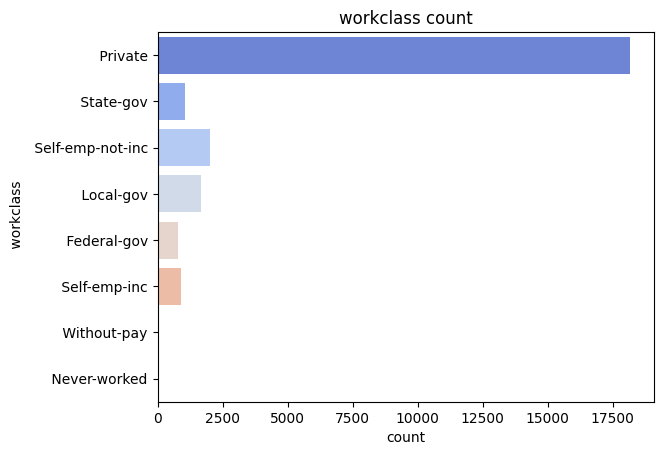

In [35]:
sns.countplot(data = x_train[' workclass'], palette = 'coolwarm')
plt.title("workclass count")

/tmp/ipython-input-38-1717948523.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = x_train[' native-country'], palette= 'pastel')


Text(0.5, 1.0, 'native-country count')

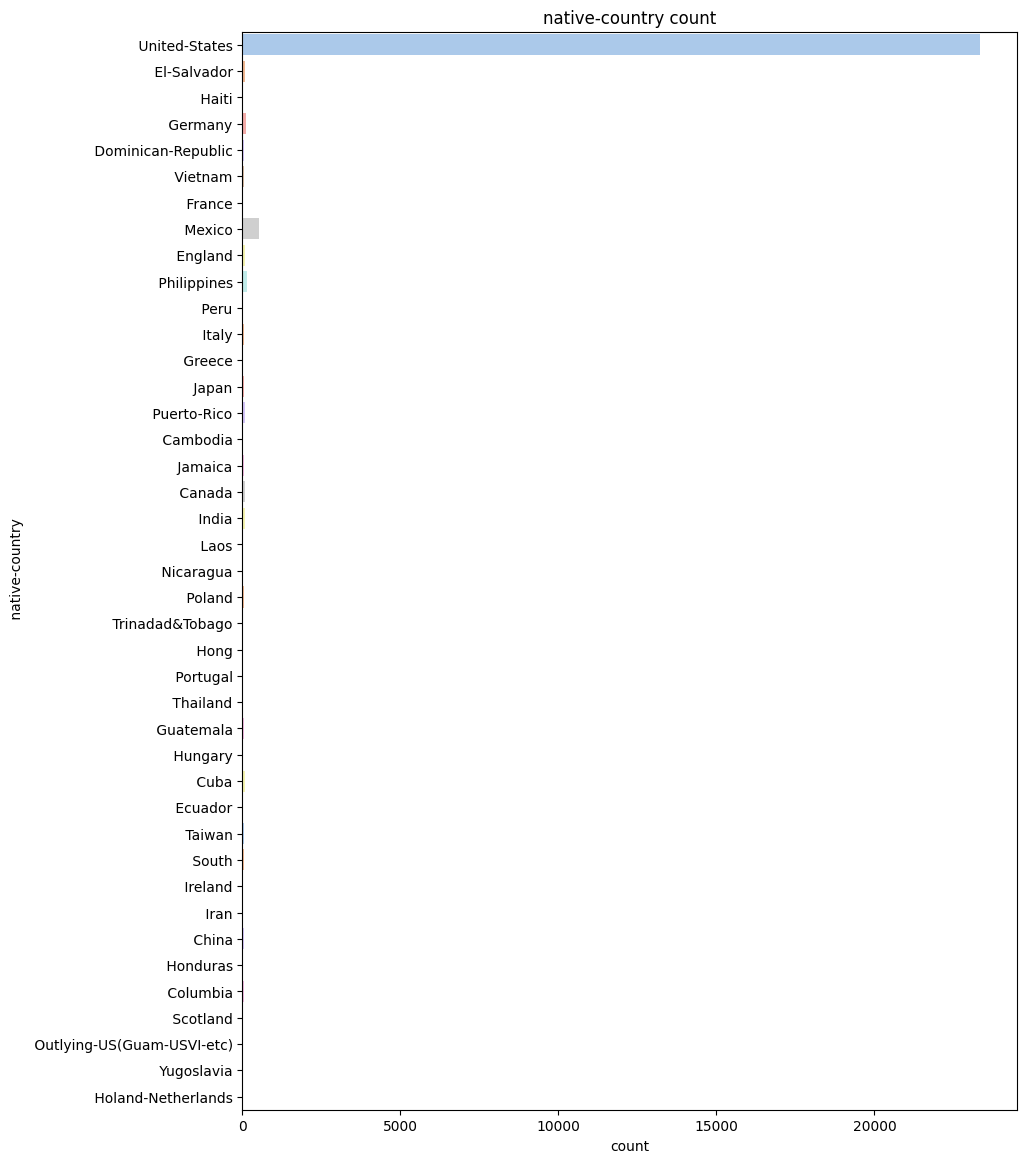

In [38]:
plt.figure(figsize=(10,14))
sns.countplot(data = x_train[' native-country'], palette= 'pastel')
plt.title("native-country count")

In both the columns, we have respective dominating values, so we can choose `most_frequent` strategy to fill the missing data.

In [39]:
imputer.fit_transform(x_train[[' native-country',' workclass']])

array([[' United-States', ' Private', False, False],
       [' United-States', ' Private', False, False],
       [' United-States', ' Private', False, False],
       ...,
       [' United-States', ' Private', False, False],
       [' United-States', ' Private', False, False],
       [' United-States', ' Self-emp-not-inc', False, False]],
      dtype=object)

In [43]:
pd.DataFrame(imputer.fit_transform(x_train[[' native-country',' workclass']]), columns=imputer.get_feature_names_out())

,native-country,workclass,missingindicator_ native-country,missingindicator_ workclass
0,United-States,Private,False,False
1,United-States,Private,False,False
2,United-States,Private,False,False
3,United-States,State-gov,False,False
4,United-States,Private,False,False
...,...,...,...,...
26043,Poland,Local-gov,False,False
26044,United-States,Private,False,False
26045,United-States,Private,False,False
26046,United-States,Private,False,False


So far, we were just experimenting how to handle the missing data but we must remember to  reassign the resulting values to `x_train`, replacing the original missing entries.

In [44]:
x_train.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country'],
      dtype='object')

In [48]:
x_train.columns = x_train.columns.str.strip()
# We can get rid of leading spaces in the column names

In [49]:
x_train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [52]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='most_frequent')
imputer3 = SimpleImputer(strategy='constant', fill_value='not available')

x_train['age'] = imputer1.fit_transform(x_train[['age']])
x_train[['workclass','native-country','hours-per-week']] = imputer2.fit_transform(x_train[['workclass','native-country','hours-per-week']])
x_train['occupation'] = imputer3.fit_transform(x_train[['occupation']]).ravel() # use .ravel() to flatten the result because fit_transform() always returns 2D output

In [53]:
x_train.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


Now, no more NaNs in the data.

In [56]:
x_test.columns = x_test.columns.str.strip()

x_test['age'] = imputer1.transform(x_test[['age']])
x_test[['workclass','native-country','hours-per-week']] = imputer2.transform(x_test[['workclass','native-country','hours-per-week']])
x_test['occupation'] = imputer3.transform(x_test[['occupation']]).ravel() # use .ravel() to flatten the result because fit_transform() always returns 2D output

In [58]:
x_test.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
32129,48.0,Private,350440,Some-college,10,Married-civ-spouse,Craft-repair,Other-relative,Asian-Pac-Islander,Male,0,0,40.0,Cambodia
7202,63.0,Self-emp-not-inc,35021,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,1977,32.0,China
4900,33.0,Private,196266,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40.0,United-States
7753,33.0,Private,221324,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,Black,Female,0,0,40.0,United-States
1208,22.0,Private,42004,Some-college,10,Never-married,not available,Own-child,White,Male,0,0,30.0,United-States
20459,32.0,Local-gov,235109,Bachelors,13,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40.0,United-States
29121,51.0,Self-emp-not-inc,46401,Some-college,10,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40.0,United-States
6790,67.0,Private,217028,Masters,14,Never-married,Other-service,Not-in-family,White,Female,0,0,40.0,United-States
335,17.0,Private,270942,5th-6th,3,Never-married,Other-service,Other-relative,White,Male,0,0,48.0,Mexico
30155,37.0,Self-emp-not-inc,326400,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,30.0,United-States


In [59]:
x_test.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


All missing values have been successfully imputed using appropriate strategies based on feature type and distribution, and the changes have been propagated back into both `x_train` and `x_test` after ensuring consistent column naming.